In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to calculate historical VaR
def historical_var(returns, alpha=0.05):
    return np.percentile(returns, alpha * 100)

# Function to calculate Monte Carlo VaR
def monte_carlo_var(returns, alpha=0.05, num_simulations=10000):
    simulations = np.random.choice(returns, (num_simulations, len(returns)))
    portfolio_returns = simulations.sum(axis=1)
    return np.percentile(portfolio_returns, alpha * 100)

# Function to perform stress test based on stock volatilities
def stress_test_volatility(returns, volatilities, alpha=1.5):
    stressed_returns = returns * (1 + alpha * volatilities)
    return stressed_returns

In [3]:
# Load stock data from CSV files
amzn_data = pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col='Date')
aapl_data = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
msft_data = pd.read_csv('MSFT.csv', parse_dates=['Date'], index_col='Date')

# Combine stock data into a single DataFrame
stock_data = pd.DataFrame({
    'AMZN': amzn_data['Adjusted Close'],
    'AAPL': aapl_data['Adjusted Close'],
    'MSFT': msft_data['Adjusted Close']
})

# Define stock tickers
stocks = ['AMZN', 'AAPL', 'MSFT']

# Define weights of the stocks in the portfolio
weights = {
    'AMZN': 0.4,
    'AAPL': 0.3,
    'MSFT': 0.3
}

# Calculate daily returns
returns = stock_data.pct_change().dropna()

# Calculate portfolio returns
returns['Portfolio'] = returns['AMZN'] * weights['AMZN'] + returns['AAPL'] * weights['AAPL'] + returns['MSFT'] * weights['MSFT']

# Calculate individual stock volatilities
volatilities = returns[stocks].std()

# Perform stress test based on stock volatilities
stressed_returns = stress_test_volatility(returns[stocks], volatilities)

# Calculate VaR after stress test
stressed_var_value = historical_var(stressed_returns.sum(axis=1))

<ipython-input-3-ff7a28777cb7>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  amzn_data = pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col='Date')
<ipython-input-3-ff7a28777cb7>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  aapl_data = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
<ipython-input-3-ff7a28777cb7>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  msft_data = pd.read_csv('MSFT.csv', parse_dates=['Date'], index_col='Date')


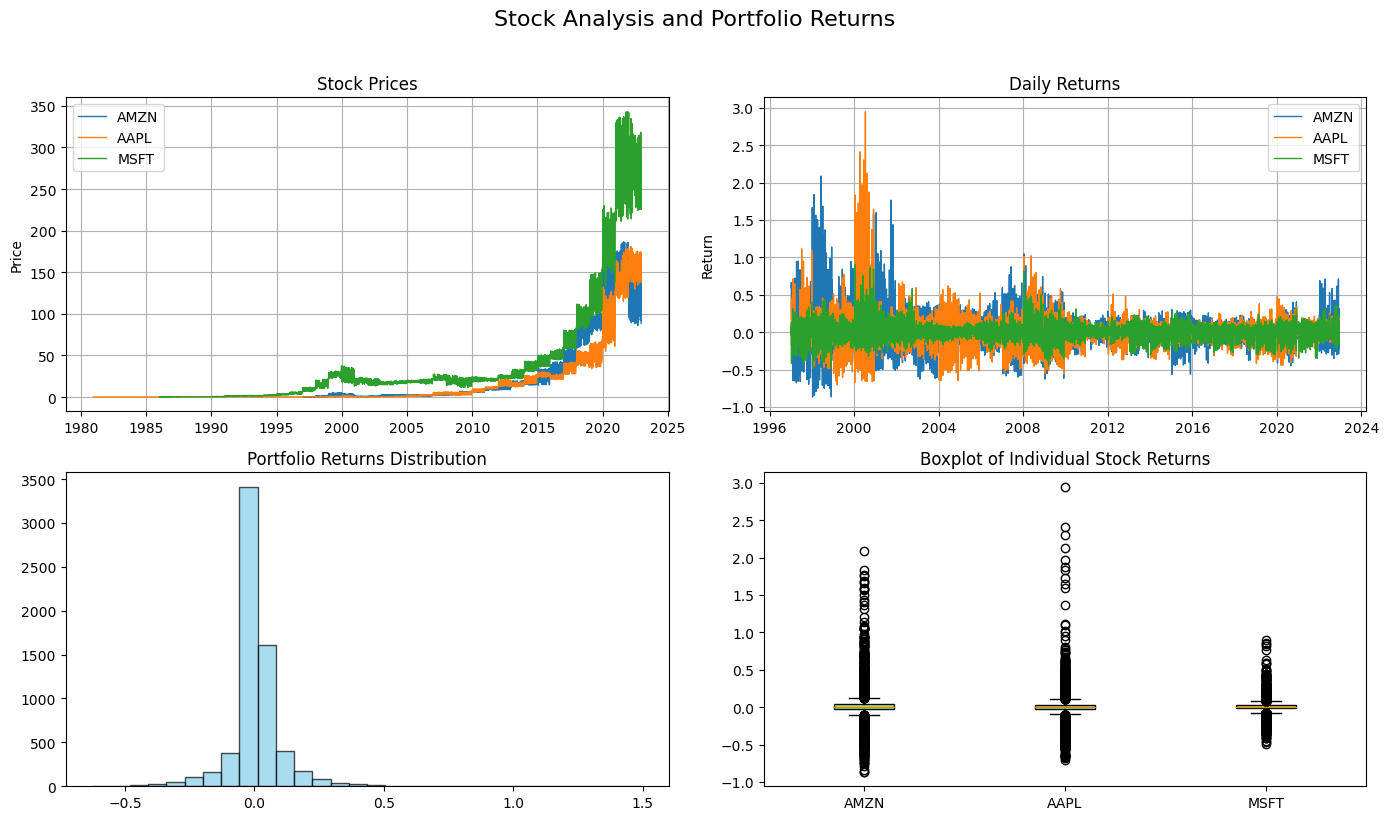

In [4]:
# Plotting 
plt.figure(figsize=(14, 8))

# Line plot of individual stock prices
plt.subplot(2, 2, 1)
for stock in stocks:
    plt.plot(stock_data.index, stock_data[stock], label=stock, linewidth=1)
plt.title('Stock Prices')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Line plot of daily returns
plt.subplot(2, 2, 2)
for stock in stocks:
    plt.plot(returns.index, returns[stock], label=stock, linewidth=1)
plt.title('Daily Returns')
plt.ylabel('Return')
plt.legend()
plt.grid(True)

# Distribution plot of portfolio returns
plt.subplot(2, 2, 3)
plt.hist(returns['Portfolio'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Portfolio Returns Distribution')

# Box plot of individual stock returns
plt.subplot(2, 2, 4)
plt.boxplot(returns[stocks].values, labels=stocks, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Individual Stock Returns')

# Adding a common title
plt.suptitle('Stock Analysis and Portfolio Returns', fontsize=16, y=1.02)

# Display the plots
plt.tight_layout()
plt.show()

In [5]:
# Print VaR results
print(f'Historical VaR (5%): {historical_var(returns["Portfolio"]):.2%}')
print(f'Monte Carlo VaR (5%): {monte_carlo_var(returns["Portfolio"]):.2%}')
print(f'VaR after Stress Test (5%): {stressed_var_value:.2%}')

Historical VaR (5%): -14.37%
Monte Carlo VaR (5%): 5324.60%
VaR after Stress Test (5%): -50.55%
